In [14]:
# start scraping information from just one page

from urllib.request import urlopen
from bs4 import BeautifulSoup

url='https://sfbay.craigslist.org/search/cta?s=0'

html = urlopen(url)
bs = BeautifulSoup(html.read(),'html.parser')
cars=bs.find_all('li',{ 'class':'result-row'})

scrapedCarsList=[]
for car in cars:
    salesTitle=car.find('a',{'class':'result-title hdrlnk'})
    price=car.find('span',{'class':'result-price'})
    postingDate=car.find('time',{'class':'result-date'})
    #Some listings do not have a price.
    if price!=None:
        new_car=[salesTitle.get_text(),postingDate.get_text(),price.get_text()]
        #print(new_car) #uncomment to see all the cars with a newline
        scrapedCarsList.append(new_car)
print(scrapedCarsList[0:3]) #uncomment to see the list of cars on the first page
len(scrapedCarsList)

[['1988 Toyota MR2 Supercharged', 'Oct 17', '$3500'], ['2006 Ford F350 Dually Lariat Limited Edition Crew Cab Short Bed Turbo', 'Oct 17', '$24990'], ['2011 Honda Accord LX Gas Saver', 'Oct 17', '$8950']]


120

In [15]:
# now let's revise the code to write the results of the first page into a csv file named 'CarCraglist.csv'.

from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

with open('CarCraglist.csv', 'w',newline='') as myFile:
    writer = csv.writer(myFile)
    writer.writerow(["sales Title", "Listing Date", "Price"])

url='https://sfbay.craigslist.org/search/cta?s=0'
html = urlopen(url)
bs = BeautifulSoup(html.read(),'html.parser')
cars=bs.find_all('li',{ 'class':'result-row'})

scrapedCarsList=[]
for car in cars:
    salesTitle=car.find('a',{'class':'result-title hdrlnk'})
    price=car.find('span',{'class':'result-price'})
    postingDate=car.find('time',{'class':'result-date'})
    #Some listings do not have a price.
    if price!=None:
        new_car=[salesTitle.get_text(),postingDate.get_text(),price.get_text()]
        scrapedCarsList.append(new_car)

with open('CarCraglist.csv', 'a',newline='',encoding='utf-8') as myFile:
    writer = csv.writer(myFile)
    writer.writerows(scrapedCarsList)

In [16]:
#  create the list of URL's for the most recent 1,200 posting

baseURL='https://sfbay.craigslist.org/search/cta?s='
urlList=[]
for i in range(0,1201,120):
    newURL=baseURL+str(i)
    urlList.append(newURL)

print(urlList[0:50]) #uncomment to see the urls
len(urlList)

['https://sfbay.craigslist.org/search/cta?s=0', 'https://sfbay.craigslist.org/search/cta?s=120', 'https://sfbay.craigslist.org/search/cta?s=240', 'https://sfbay.craigslist.org/search/cta?s=360', 'https://sfbay.craigslist.org/search/cta?s=480', 'https://sfbay.craigslist.org/search/cta?s=600', 'https://sfbay.craigslist.org/search/cta?s=720', 'https://sfbay.craigslist.org/search/cta?s=840', 'https://sfbay.craigslist.org/search/cta?s=960', 'https://sfbay.craigslist.org/search/cta?s=1080', 'https://sfbay.craigslist.org/search/cta?s=1200']


11

In [17]:
#  trun the scraping script into a function so that it can  takes the page number (0, 120, 240, ...) as input and returns a list of all the cars on the page in a list of lists format.

def craigslistCarsScrape(pageNumber):
    print('*** Scraping cars on page:',int(pageNumber/120+1),'***\n\n')

    baseURL='https://sfbay.craigslist.org/search/cta?s='
    url=baseURL+str(pageNumber)
    html = urlopen(url)
    bs = BeautifulSoup(html.read(),'html.parser')
    cars=bs.find_all('li',{ 'class':'result-row'})
    scrapedCarsList=[]            
    for car in cars:
        salesTitle=car.find('a',{'class':'result-title hdrlnk'})
        price=car.find('span',{'class':'result-price'})
        postingDate=car.find('time',{'class':'result-date'})
        #Some listings do not have a price.
        if price!=None:
            new_car=[salesTitle.get_text(),postingDate.get_text(),price.get_text()]
            scrapedCarsList.append(new_car)
    return scrapedCarsList

In [11]:
# error handling to make the codes more robust

from urllib.error import HTTPError
from urllib.error import URLError

def craigslistCarsScraper(pageNumber):
    print('*** Scraping cars on page:',int(pageNumber/120+1),'***\n\n')

    baseURL='https://boston.craigslist.org/search/cta?s='
    url=baseURL+str(pageNumber)
    
    try:
        
        html = urlopen(url)
    
    except HTTPError as e:
        print(e)
        print('-----------------------HTTPError----------------------')
        return None
    except URLError as e:
        print('Server cound not be found')
        print('-----------------------URLError----------------------')
        return None
    
    bs = BeautifulSoup(html.read(),'html.parser')
    
    try:
        
        cars=bs.find_all('li',{ 'class':'result-row'})
    
    except AttributeError as e:
        print('Tag was not found')
        print('-----------------------AttributeError----------------------')
    
    else:
        scrapedCarsList=[]
        for car in cars:
            salesTitle=car.find('a',{'class':'result-title hdrlnk'})
            price=car.find('span',{'class':'result-price'})
            postingDate=car.find('time',{'class':'result-date'})
            #Some listings do not have a price.
            if price!=None:
                new_car=[salesTitle.get_text(),postingDate.get_text(),price.get_text()]
                    
                scrapedCarsList.append(new_car)
               
        return scrapedCarsList

In [18]:
craigslistCarsScraper(600)

*** Scraping cars on page: 6 ***




[['69 Cutlass Comv. 442 tribute 445 4sp.', 'Oct 16', '$18900'],
 ['2003 Ford F550 Roll Back Wrecker Bullet proofed diesel Manual Trans',
  'Oct 16',
  '$13500'],
 ['2010 Honda Accord  4cyl auto $3500', 'Oct 16', '$0'],
 ['2007 H3 Hummer', 'Oct 16', '$6500'],
 ['2002 Chevrolet Suburban LT 4x4! $3,990', 'Oct 16', '$3990'],
 ['2006 Subaru Tribeca B9 Limited**1 Owner**Dealer Serviced**Ex. Cond.**',
  'Oct 16',
  '$3995'],
 ['2008 chev new body  Silverado. Reg cab. 4 wheel drive $5700',
  'Oct 16',
  '$0'],
 ['2003 Ford Expedition 4wd', 'Oct 16', '$2500'],
 ['2004 Ford f150 one owner 38k original miles', 'Oct 16', '$5999'],
 ['1965 CHEVY NOVA HT SPORTS COUPE VERY FAST AND LOUD', 'Oct 16', '$1'],
 ['2003 Oldsmobile Alero', 'Oct 16', '$600'],
 ['► 2017 FORD FUSION TITANIUM - ECOBOOST, HTD LEATHER, SONY, 18" WHEELS',
  'Oct 16',
  '$16495'],
 ['97 Jeep Wrangler', 'Oct 16', '$6000'],
 ['2004 NISSAN ALTIMA', 'Oct 16', '$1995'],
 ['2008 Acura TL', 'Oct 16', '$5999'],
 ['2012 NISSAN SENTRA', 'Oct 

In [20]:
# run the function in a loop and write the resutls on a csv

with open('craigslist_cars_final.csv', 'w',newline='') as myFile:
    writer = csv.writer(myFile)
    writer.writerow(["Listing Title", "Listing Date", "Price"])

with open('craigslist_cars_final.csv', 'a',newline='',encoding='utf-8') as myFile:
    writer = csv.writer(myFile)
    for i in range(0,1201,120):
        scrapedCarsList=craigslistCarsScraper(i)
        writer.writerows(scrapedCarsList)

print('----------------------------------------Well done---------------------------------------------- ')
print('-----------------------------------Scraping completed------------------------------------------ ')
print('------------Please find the csv file in the folder where this scraping file exists------------- ')

*** Scraping cars on page: 1 ***


*** Scraping cars on page: 2 ***


*** Scraping cars on page: 3 ***


*** Scraping cars on page: 4 ***


*** Scraping cars on page: 5 ***


*** Scraping cars on page: 6 ***


*** Scraping cars on page: 7 ***


*** Scraping cars on page: 8 ***


*** Scraping cars on page: 9 ***


*** Scraping cars on page: 10 ***


*** Scraping cars on page: 11 ***


----------------------------------------Well done---------------------------------------------- 
-----------------------------------Scraping completed------------------------------------------ 
------------Please find the csv file in the folder where this scraping file exists------------- 


In [44]:
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv("craigslist_cars_final.csv") 
data.head()

,Listing Title,Listing Date,Price
0,2014 FORD Escape TITANIUM SUV AWD -CALL/TEXT T...,Oct 17,$13843
1,2006 Bentley Continental GT AWD 2dr Coupe,Oct 17,$33997
2,WE... FINANCE... ANYOOOOONE!!! - $500 WE FINA...,Oct 17,$0
3,"2013 Honda Civic Si 70,000 Miles",Oct 17,$2400
4,2016 Chevrolet Silverado 1500 LT,Oct 17,$0


In [100]:
original_sum_price = 0
sum_price = 0
price_list = []

# Convert from "$12355" to "12355" with integer type
for price in data['Price']:
    # Clean up price data
    price_list.append(int(price[1:]))
    original_sum_price += int(price[1:])

data['dollars'] = price_list

# Filter out extraneous priced listings
min_listing_amount = 800
max_listing_amount = 90000
data_price_range = data[(data['dollars'] > min_listing_amount ) & (data_price_range['dollars'] < max_listing_amount )]

sum_price = np.sum(data_price_range['dollars'])
avg_price_range = int(data_price_range.dollars.mean())

print('[INFO]: Sum price is: {}'.format(sum_price))
print('[INFO]: Average price is: {}'.format(avg_price_range))

[INFO]: Sum price is: 15285607
[INFO]: Average price is: 12921


In [79]:
words = []
for listing_title in data_price_range['Listing Title'].values:
    for word in listing_title.split(' '):
        if word.isnumeric():
            pass
#             print(word)
#             continue
        if word.isalpha():
            print(word)
            words.append(word)
#             continue




FORD
Escape
TITANIUM
SUV
AWD
Bentley
Continental
GT
AWD
Coupe
Honda
Civic
Si
Miles
CHEVROLET
KODIAK
DUMP
TRUCK
FORD
Fusion
SEL
AWD
SEL
MERCEDES
BENZ
MATIC
EXECUTIVE
PACKAGE
BLACK
BLACK
FORD
F
SUPER
CAB
CORVETTE
CONVERTIBLE
OWNER
POLISHED
WHLS
PADDLE
SHIFT
MILES
MITSUBISHI
RARE
LAST
YEAR
TWIN
TURBO
ONLY
DODGE
Ram
BIG
HORN
SLT
Chevrolet
Chevy
Corvette
Base
Convertible
SUPER
WELL
MAINTAINE
Jeep
Wrangler
Unlimited
Sahara
NAV
Hard
Soft
Top
Clean
FORD
MUSTANG
COBRA
TERMINATOR
OWNER
ONLY
MILES
BORLA
Nissan
Altima
SV
NAV
Moonroof
Heated
Seats
CLEAN
Mitsubishi
Outlander
LS
SUV
SUPER
WELL
FORD
F
SUPERCREW
JEEP
WRANGLER
UNLIMITED
SAHARA
LEATHER
ONLY
MILES
Porsche
Cayenne
GTS
Tiptronic
AWD
SUV
SUPER
WELL
Chrysler
Honda
Civic
Dodge
Charger
Daytona
Toyota
Limited
AWD
Like
Mazda
Sport
Hatch
DODGE
Charger
SXT
SEDAN
Dodge
Grand
Caravan
EXTENDED
PASSENGER
VAN
WITH
STOW
GO
Jeep
Wrangler
Unlimited
Sahara
Dodge
Durango
Sport
SXT
Only
Honda
Accord
Coupe
AT
Ford
Explorer
XLT
AWD
SUV
We
Finance
Anyone
Chevrol

FORD
SUPER
DUTY
CREW
CAB
Hyundai
Sonata
Limited
Honda
Low
Mileage
Scion
xB
Parklan
Edition
Wagon
SUPER
WELL
Ford
Super
Cab
Toyota
Corolla
LE
Toyota
Corolla
Honda
Pilot
DODGE
Nitro
AWD
SUV
Ford
Fusion
SE
SEDAN
FORD
Explorer
EB
EDDIE
BAUER
Chevy
Silverado
LT
Crew
Cab
GMC
Yukon
SLT
SUV
HONDA
AWD
SUV
Ford
Focus
SE
Flex
Fuel
Maxima
SL
gray
with
blak
down
payment
Ford
crew
cab
platinum
Chevrolet
Silverado
LS
CrewCab
One
Dodge
Ram
for
parts
Chevrolet
Chevy
Malibu
LS
Sedan
EASY
Honda
very
clean
in
and
out
Ford
Escape
XLT
One
Owner
Low
Jeep
Liberty
Limited
Ford
Fusion
Se
only
drive
at
bring
it
t
Toyota
Tacoma
PLOW
Honda
Accord
Coupe
Dodge
Ram
SLT
Low
Land
Rover
Discovery
Sport
HSE
suv
Ram
Classic
Big
Horn
pickup
Lexus
ES
sedan
Jeep
Grand
Cherokee
Laredo
Chevrolet
Cruze
Auto
silverado
door
Chevrolet
Silverado
LS
ExtendedCab
One
CHEVROLET
IMPALA
SEDAN
OWNER
CAR
LOW
MILEAGE
RUNS
GD
VERY
CLEAN
Chevrolet
Colorado
LS
ExtendedCab
Ford
Fusion
SEL
Low
Ford
F
Platinum
SuperCrew
Styleside
SB
Fin
Honda
Civ

['FORD',
 'Escape',
 'TITANIUM',
 'SUV',
 'AWD',
 'Bentley',
 'Continental',
 'GT',
 'AWD',
 'Coupe',
 'Honda',
 'Civic',
 'Si',
 'Miles',
 'CHEVROLET',
 'KODIAK',
 'DUMP',
 'TRUCK',
 'FORD',
 'Fusion',
 'SEL',
 'AWD',
 'SEL',
 'MERCEDES',
 'BENZ',
 'MATIC',
 'EXECUTIVE',
 'PACKAGE',
 'BLACK',
 'BLACK',
 'FORD',
 'F',
 'SUPER',
 'CAB',
 'CORVETTE',
 'CONVERTIBLE',
 'OWNER',
 'POLISHED',
 'WHLS',
 'PADDLE',
 'SHIFT',
 'MILES',
 'MITSUBISHI',
 'RARE',
 'LAST',
 'YEAR',
 'TWIN',
 'TURBO',
 'ONLY',
 'DODGE',
 'Ram',
 'BIG',
 'HORN',
 'SLT',
 'Chevrolet',
 'Chevy',
 'Corvette',
 'Base',
 'Convertible',
 'SUPER',
 'WELL',
 'MAINTAINE',
 'Jeep',
 'Wrangler',
 'Unlimited',
 'Sahara',
 'NAV',
 'Hard',
 'Soft',
 'Top',
 'Clean',
 'FORD',
 'MUSTANG',
 'COBRA',
 'TERMINATOR',
 'OWNER',
 'ONLY',
 'MILES',
 'BORLA',
 'Nissan',
 'Altima',
 'SV',
 'NAV',
 'Moonroof',
 'Heated',
 'Seats',
 'CLEAN',
 'Mitsubishi',
 'Outlander',
 'LS',
 'SUV',
 'SUPER',
 'WELL',
 'FORD',
 'F',
 'SUPERCREW',
 'JEEP',
 'WR

In [122]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import os

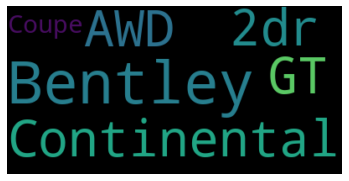

In [116]:
text = data_price_range['Listing Title'].values[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

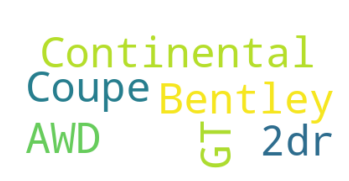

In [119]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Saving File

In [125]:
output_img_path = 'img'
if not os.path.exists(output_img_path):
    os.mkdir(output_img_path)

# Save the image in the img folder:
wordcloud.to_file("img/first_listing.png")

You may notice interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly

more info:
https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html

In [159]:
text = " ".join(review for review in data_price_range['Listing Title'])
print ("There are {} target words in the Listing Titles of all cars.".format(len(text)))

num_words = 200
dfwords = pd.DataFrame(words,columns=['word'])

text = " ".join(review for review in dfwords['word'].value_counts().keys()[0:num_words])
print ("There are {} target words in the Listing Titles of all cars.".format(len(text)))


There are 55572 target words in the Listing Titles of all cars.
There are 1193 target words in the Listing Titles of all cars.


Put it all together form the giant string of words

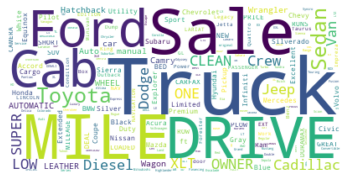

In [157]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["online", "finance", "anyone", "call","text"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Using Pandas

In [143]:
dfwords = pd.DataFrame(words,columns=['word'])
dfwords['word'].value_counts().keys()[0:num_words]

Index(['AWD', 'Ford', 'Cab', 'Chevrolet', 'Honda', 'Toyota', 'SUV', 'Chevy',
       'FINANCE', 'Sedan'],
      dtype='object')